In [29]:
import numpy as np
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]))
target = pd.DataFrame(raw_df.values[1::2, 2])
print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [26]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Linear Regression

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
mse = cross_val_score(lr, data, target, scoring = 'neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
mean_mse

-37.131807467699204

## Ridge Regression

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV 
# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.

ridge = Ridge()
parameters={"alpha": [1e-14, 1e-5, 1, 100, 100]}
ridge_regression  = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5)
ridge_regression.fit(data,target)
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 100}
-29.905701947540337


## Lasso Regression

In [60]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV 
# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.

lasso = Lasso()
parameters={"alpha": [1,100,1000]}
lasso_regression  = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5)
lasso_regression.fit(data,target)
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1}
-35.531580220694856


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(data,target, test_size=0.3, random_state = 0)

In [66]:
predict_lasso = lasso_regression.predict(X_test)
predict_ridge = ridge_regression.predict(X_test)

C:\Users\dragh\AppData\Local\Temp\ipykernel_27104\1987261079.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predict_lasso)


<Axes: ylabel='Density'>

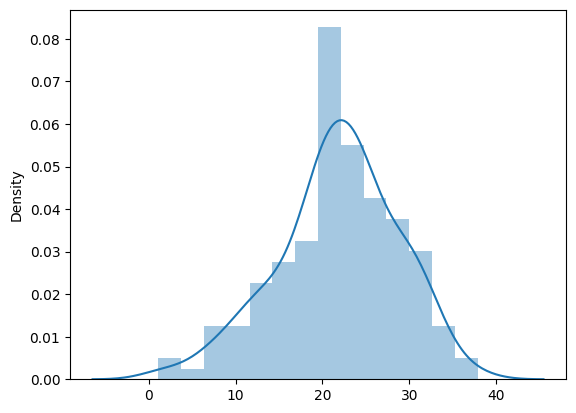

In [67]:
import seaborn as sns

sns.distplot(predict_lasso)

C:\Users\dragh\AppData\Local\Temp\ipykernel_27104\3539762337.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predict_ridge)


<Axes: ylabel='Density'>

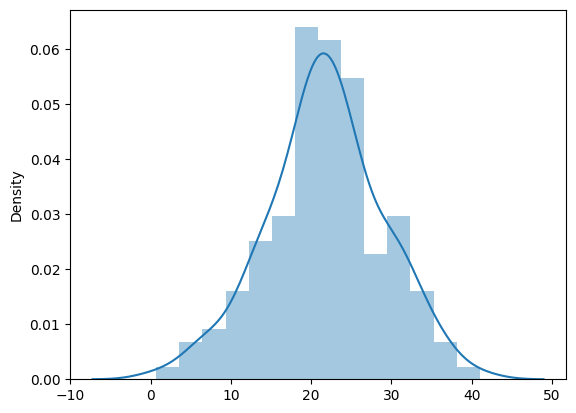

In [68]:
import seaborn as sns

sns.distplot(predict_ridge)